# Identifying Patient Cohorts in [MIMIC-II](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3124312/)


In [1]:
%matplotlib inline

In [2]:
import pymysql
import pandas as pd
import getpass
import pandas as pd
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt

In [3]:
conn = pymysql.connect(host="mysql",
                       port=3306,user="jovyan",
                       passwd=getpass.getpass("Enter MySQL passwd for jovyan"),db='mimic2')
cursor = conn.cursor()

Enter MySQL passwd for jovyan········


In [4]:
pd.read_sql("""SELECT * FROM admissions LIMIT 50""", conn).head()

,hadm_id,subject_id,admit_dt,disch_dt
0,28766,56,2644-01-17 00:00:00,2644-01-23 00:00:00
1,2075,3,2682-09-07 00:00:00,2682-09-18 00:00:00
2,20666,21,3138-10-29 00:00:00,3138-11-11 00:00:00
3,20882,21,3139-03-19 00:00:00,3139-03-28 00:00:00
4,12532,12,2875-09-26 00:00:00,2875-10-09 00:00:00


In [33]:
admit1.weekday

17

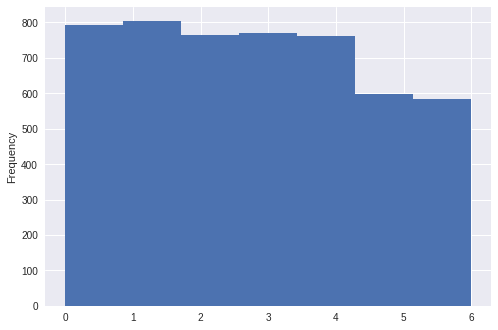

In [35]:
admit1 = hosps["admit_dt"][0]
hosps["day of week"] = hosps.apply(lambda r:r["admit_dt"].weekday(),axis=1)
hosps["day of week"].plot.hist(bins=7)

## Exercise: Create a Histogram of the length of stay for subjects in the database

In [27]:
hosps = \
pd.read_sql("""SELECT * FROM admissions""", conn)
print(hosps.shape)
hosps["LOS"] = hosps["disch_dt"] - hosps["admit_dt"]
hosps["LOS2"] = \
hosps.apply(lambda row: 
            (row["disch_dt"]-row["admit_dt"]).total_seconds()/(24*3600),
            axis=1)
hosps.head()

(5074, 4)


,hadm_id,subject_id,admit_dt,disch_dt,LOS,LOS2
0,28766,56,2644-01-17 00:00:00,2644-01-23 00:00:00,6 days,6.0
1,2075,3,2682-09-07 00:00:00,2682-09-18 00:00:00,11 days,11.0
2,20666,21,3138-10-29 00:00:00,3138-11-11 00:00:00,13 days,13.0
3,20882,21,3139-03-19 00:00:00,3139-03-28 00:00:00,9 days,9.0
4,12532,12,2875-09-26 00:00:00,2875-10-09 00:00:00,13 days,13.0


In [26]:
hosps["LOS2"].describe()

count    5074.000000
mean       11.672645
std        13.491667
min         0.000000
25%         4.000000
50%         8.000000
75%        14.000000
max       295.000000
Name: LOS2, dtype: float64

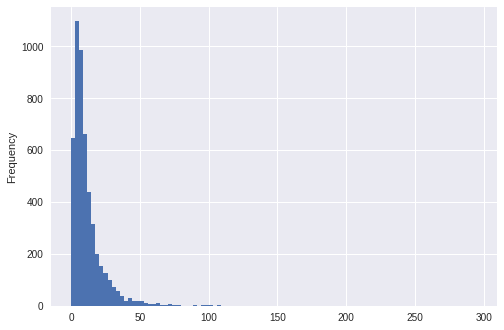

In [25]:
hosps["LOS2"].plot.hist(bins=100)

## Exercise: Create a histogram of the day of the week when patients are admitted